In [0]:
import numpy as np
import scipy
import scipy.stats
import torch as t

import matplotlib.pyplot as plt
from IPython.display import clear_output, display

from torch.nn import Sequential, Linear, ReLU, LeakyReLU, Dropout, Sigmoid

In [0]:
%matplotlib inline

In [0]:
if t.cuda.is_available():
    if t.cuda.device_count()>1:
        device = t.device('cuda:1')
    else:
        device = t.device('cuda')   
else:
    device = t.device('cpu')

In [0]:
# device=t.device('cpu') #Overrride the above device choice

Generate the sample 2D distribution: uniform from unit circle.  

In [0]:
angle = np.random.uniform(-np.pi,np.pi,(1000,1)).astype('float32')
data = np.concatenate((np.cos(angle), np.sin(angle)),axis=1)

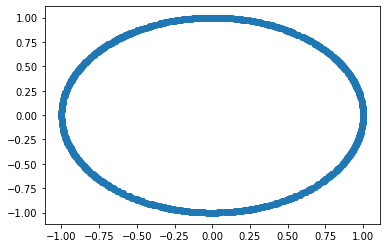

In [6]:
plt.scatter(data[:,0], data[:,1])

In [0]:
data_t = t.from_numpy(data)

In [8]:
data_t

tensor([[ 0.1066, -0.9943],
        [ 0.6811,  0.7322],
        [-0.2317,  0.9728],
        ...,
        [ 0.9931,  0.1172],
        [ 0.2666, -0.9638],
        [-0.8010,  0.5986]])

In [9]:
len(data_t)

1000

In [0]:
discriminator = Sequential(Linear(2,1),  Sigmoid()) #dummy discriminator: please subsitute you own implementation 

In [0]:
discriminator = discriminator.to(device) 

In [0]:
generator = Sequential(Linear(2,2))# dummy generator: please subsitute you own implementation 

In [0]:
generator= generator.to(device)

In [0]:
out_t = generator(t.empty(1000,2, device=device).uniform_(-1,1));

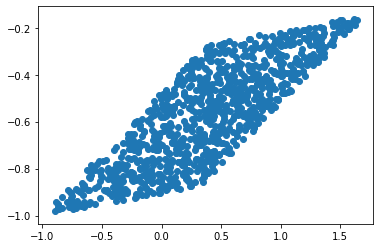

In [15]:
plt.scatter(out_t.data.cpu().numpy()[:,0],out_t.data.cpu().numpy()[:,1])

In [0]:
d_optimizer = t.optim.Adam(discriminator.parameters(), lr=0.0002)

In [0]:
g_optimizer = t.optim.Adam(generator.parameters(), lr=0.0002)

### Problem 1

Implement the GAN train loop that will train GAN to generate from the sample distribution.  

In [0]:
import random 

In [0]:
generator = Sequential(Linear(1,512), LeakyReLU(0.2, inplace=True),
                       Linear(512,512), LeakyReLU(0.2, inplace=True),
                       Linear(512,256), LeakyReLU(0.2, inplace=True),
                       Linear(256,32), LeakyReLU(0.2, inplace=True),
                       Linear(32, 2))

discriminator = Sequential(Linear(2,512), LeakyReLU(0.2, inplace=True),
                           Linear(512,256), LeakyReLU(0.2, inplace=True),
                           Linear(256,32), LeakyReLU(0.2, inplace=True),
                           Linear(32,1),  Sigmoid())

discriminator = discriminator.to(device) 
generator= generator.to(device)


data_t = data_t.to(device)

In [0]:
bce = t.nn.BCELoss()
d_optimizer = t.optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = t.optim.Adam(generator.parameters(), lr=0.0002)



In [0]:
from IPython.display import clear_output  

10 1.396676778793335 0.8241339325904846


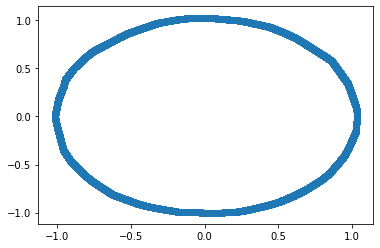

In [0]:
mini_batch_size = 256
k_discriminator = 2
k_generator = 1
for epoch in range(1,11):
    for batch in range(len(data)//mini_batch_size):
        for k_d in range(k_discriminator):
            d_optimizer.zero_grad()
            kr = np.random.randint(0,len(data)//mini_batch_size )
          
            d = data_t[kr*mini_batch_size:(kr+1)*mini_batch_size]
            real_labels = t.ones(mini_batch_size, 1, device=device)
            d_real_loss = bce(discriminator(d), 0.9*real_labels)
      
            z = t.empty(mini_batch_size,1, device=device).uniform_(-1,1)
            g_out = generator(z)
            fake_labels = t.zeros(mini_batch_size, 1, device=device)
            d_fake_loss = bce(discriminator(g_out), fake_labels)
            d_loss = d_real_loss + d_fake_loss
            d_loss.backward()
            d_optimizer.step()
    
        g_optimizer.zero_grad()
        z = t.empty(mini_batch_size, 1, device=device).uniform_(-1,1)
        g_out = generator(z)
        g_loss = bce(discriminator(g_out), real_labels)
        g_loss.backward()
        g_optimizer.step()
        
    if epoch%10 == 0:
        with t.no_grad():
                z = t.empty(len(data_t),1, device=device).uniform_(-1,1)
                real_labels = t.ones(len(data_t),1, device=device)
                fake_labels = t.zeros(len(data_t),1, device=device)
                g_out =  generator(z)
                dg_out = discriminator(g_out)
                d_loss =  bce(discriminator(data_t), real_labels)
                d_loss +=  bce(dg_out, fake_labels)
                
                g_loss = bce(dg_out, real_labels)
                
                clear_output() 
                print(epoch, d_loss.item(), g_loss.item())
                gen  = generator(t.empty(10000,1).uniform_(-1,1).to(device))
                plt.scatter(gen.data.cpu().numpy()[:,0],gen.data.cpu().numpy()[:,1])  
                plt.show()
              
      
          

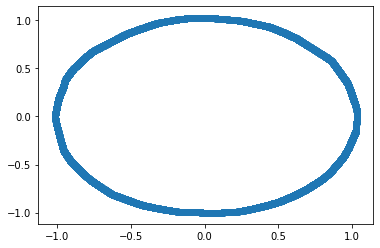

In [0]:
gen  = generator(t.empty(10000,1).uniform_(-1,1).to(device))
plt.scatter(gen.data.cpu().numpy()[:,0],gen.data.cpu().numpy()[:,1])

In [26]:
from google.colab import files

filename1 = "2D-circle-GAN-generator.pt"
t.save(generator, filename1)
files.download(filename1) 

filename2 = "2D-circle-GAN-discriminator.pt"
t.save(discriminator, filename2)
files.download(filename2) 

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LeakyReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sigmoid. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


### Problem 2

Use another sampling distribution. One that is not concentrated on a line e.g. an ellipse. 

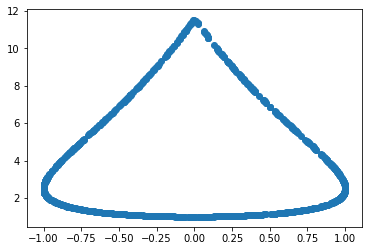

In [19]:
angle = np.random.uniform(-np.pi,np.pi,(1000,1)).astype('float32')
data = np.concatenate((np.sin(angle), np.cosh(angle)),axis=1)
plt.scatter(data[:,0], data[:,1])
data_t = t.from_numpy(data)

In [0]:
generator = Sequential(Linear(1,512), LeakyReLU(0.2, inplace=True),
                       Linear(512,512), LeakyReLU(0.2, inplace=True),
                       Linear(512,256), LeakyReLU(0.2, inplace=True),
                       Linear(256,32), LeakyReLU(0.2, inplace=True),
                       Linear(32, 2))

discriminator = Sequential(Linear(2,512), LeakyReLU(0.2, inplace=True),
                           Linear(512,256), LeakyReLU(0.2, inplace=True),
                           Linear(256,32), LeakyReLU(0.2, inplace=True),
                           Linear(32,1),  Sigmoid())

discriminator = discriminator.to(device) 
generator= generator.to(device)


data_t = data_t.to(device)
bce = t.nn.BCELoss()
d_optimizer = t.optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = t.optim.Adam(generator.parameters(), lr=0.0002)

500 1.422633171081543 0.9092018008232117


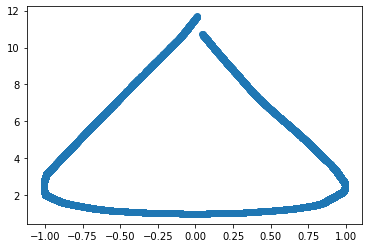

In [23]:
mini_batch_size = 256
k_discriminator = 2
k_generator = 1
for epoch in range(1,1501):
    for batch in range(len(data)//mini_batch_size):
        for k_d in range(k_discriminator):
            d_optimizer.zero_grad()
            kr = np.random.randint(0,len(data)//mini_batch_size )
          
            d = data_t[kr*mini_batch_size:(kr+1)*mini_batch_size]
            real_labels = t.ones(mini_batch_size, 1, device=device)
            d_real_loss = bce(discriminator(d), 0.9*real_labels)
      
            z = t.empty(mini_batch_size,1, device=device).uniform_(-1,1)
            g_out = generator(z)
            fake_labels = t.zeros(mini_batch_size, 1, device=device)
            d_fake_loss = bce(discriminator(g_out), fake_labels)
            d_loss = d_real_loss + d_fake_loss
            d_loss.backward()
            d_optimizer.step()
    
        g_optimizer.zero_grad()
        z = t.empty(mini_batch_size, 1, device=device).uniform_(-1,1)
        g_out = generator(z)
        g_loss = bce(discriminator(g_out), real_labels)
        g_loss.backward()
        g_optimizer.step()
        
    if epoch%10 == 0:
        with t.no_grad():
                z = t.empty(len(data_t),1, device=device).uniform_(-1,1)
                real_labels = t.ones(len(data_t),1, device=device)
                fake_labels = t.zeros(len(data_t),1, device=device)
                g_out =  generator(z)
                dg_out = discriminator(g_out)
                d_loss =  bce(discriminator(data_t), real_labels)
                d_loss +=  bce(dg_out, fake_labels)
                
                g_loss = bce(dg_out, real_labels)
                
                clear_output() 
                print(epoch, d_loss.item(), g_loss.item())
                gen  = generator(t.empty(10000,1).uniform_(-1,1).to(device))
                plt.scatter(gen.data.cpu().numpy()[:,0],gen.data.cpu().numpy()[:,1])  
                plt.show()
              

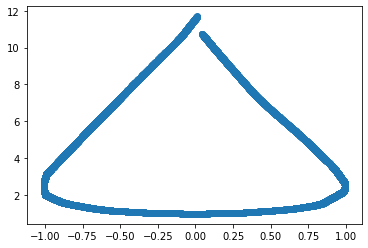

In [24]:
gen  = generator(t.empty(10000,1).uniform_(-1,1).to(device))
plt.scatter(gen.data.cpu().numpy()[:,0],gen.data.cpu().numpy()[:,1])

In [27]:
filename1 = "2D-other-GAN-generator.pt"
t.save(generator, filename1)
files.download(filename1) 

filename2 = "2D-other-GAN-discriminator.pt"
t.save(discriminator, filename2)
files.download(filename2) 

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LeakyReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sigmoid. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
